<a href="https://colab.research.google.com/github/joaogabriel87/A3---Inteligencia-Artificial/blob/main/AED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
#Carregar e padrozinar as colunas
anos = range(2015,2023)
dfs = []

In [102]:
for ano in anos:
    try:
        df = pd.read_csv(f"acidentes_{ano}.csv", sep=";", encoding='utf-8')  # Try with encoding
        df.rename(columns={"data": "Data"}, inplace=True)
        df["Ano"] = ano
        dfs.append(df)
        print(f"Successfully loaded data for year {ano}")  # Confirmation message
    except Exception as e:
        print(f"Error reading file for year {ano}: {e}")

print(f"Total DataFrames loaded: {len(dfs)}")  # Check the number of loaded DataFrames

Successfully loaded data for year 2015
Successfully loaded data for year 2016
Successfully loaded data for year 2017
Successfully loaded data for year 2018
Successfully loaded data for year 2019
Successfully loaded data for year 2020
Successfully loaded data for year 2021
Successfully loaded data for year 2022
Total DataFrames loaded: 8


In [103]:
#Concater todas
df_principal = pd.concat(dfs, ignore_index=True)
print("Anos disponivel:", df_principal['Ano'].unique())

Anos disponivel: [2015 2016 2017 2018 2019 2020 2021 2022]


In [104]:
df_2018_2019 = df_principal[(df_principal['Ano'] == 2018) | (df_principal['Ano'] == 2019)]

df_2018_2019['Data'] = pd.to_datetime(df_2018_2019['Data'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')

df_principal.loc[df_2018_2019.index, 'Data'] = df_2018_2019['Data']


<ipython-input-104-d3adaae40c46>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018_2019['Data'] = pd.to_datetime(df_2018_2019['Data'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')


In [105]:
df_principal.to_excel("acidentes_2015_2022.xlsx", index=False)

In [106]:
#Limpeza
df_principal['Data'] = pd.to_datetime(df_principal['Data'], errors='coerce')  # Converter datas
df_principal.dropna(subset=['Data'], inplace=True)  # Remove linhas sem data



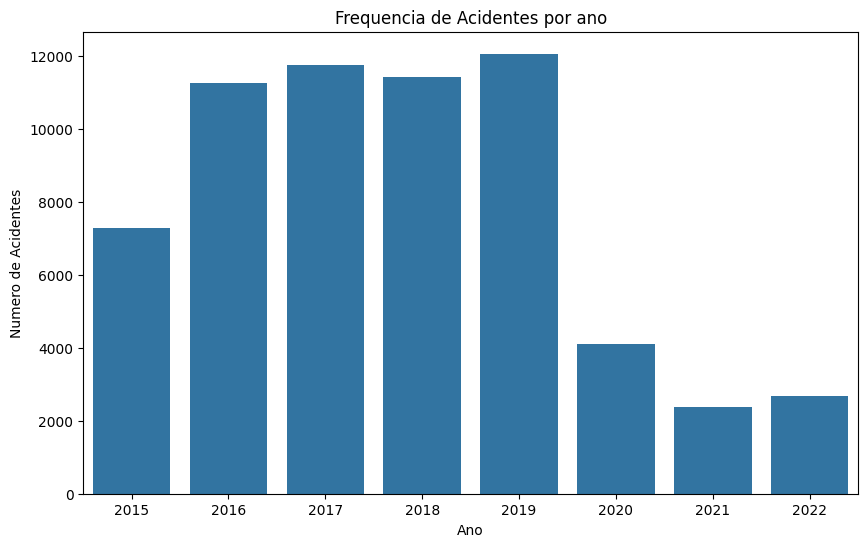

In [107]:
#Analise e visualização
acidentes_por_ano = df_principal['Ano'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=acidentes_por_ano.index, y=acidentes_por_ano.values)
plt.title("Frequencia de Acidentes por ano")
plt.xlabel("Ano")
plt.ylabel("Numero de Acidentes")
plt.show()